In [40]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np 
import pandas as pd 

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

In [41]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [42]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [43]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [44]:
df.size

900000

In [45]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [46]:
df.duplicated().sum()

3854

In [47]:
df = df.drop_duplicates()

In [48]:
df.duplicated().sum()

0

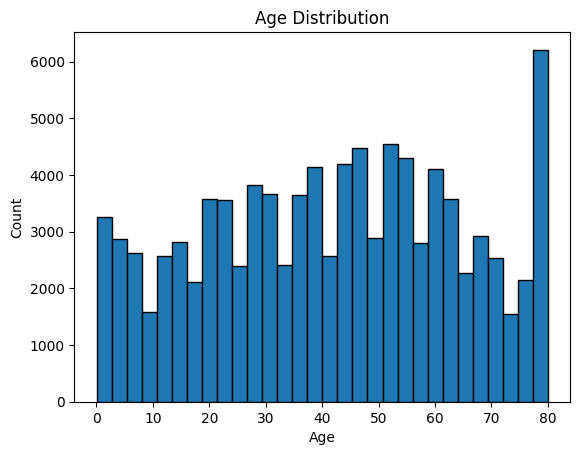

In [49]:
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

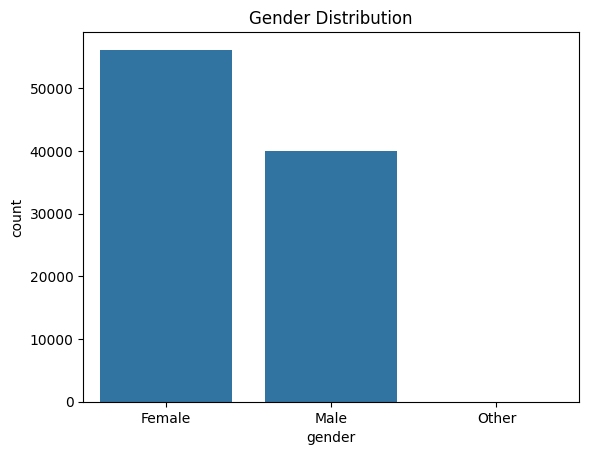

In [50]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [51]:
count_survival_classes = df['gender'].value_counts()
print("Counts for each class in 'survived':")
print(count_survival_classes)

Counts for each class in 'survived':
gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64


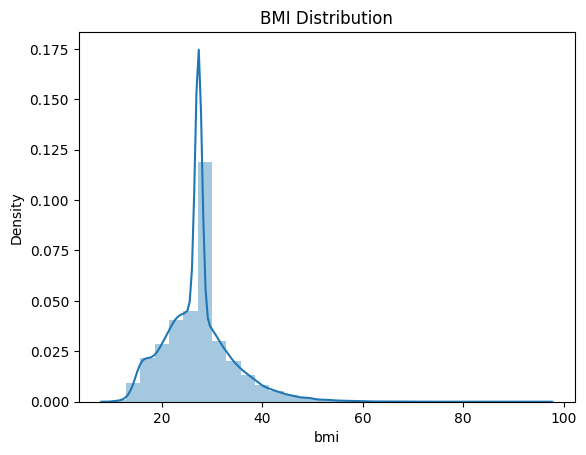

In [52]:
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

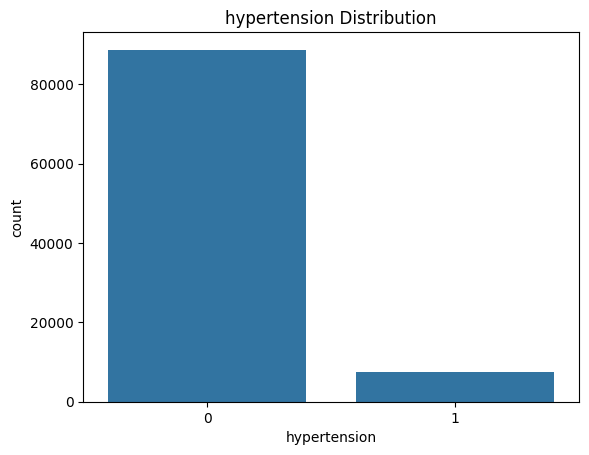

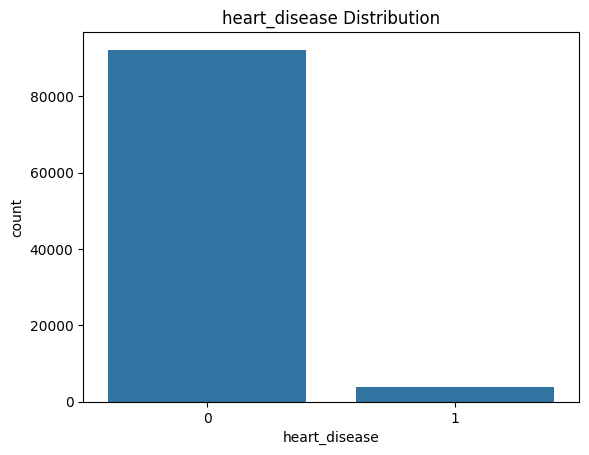

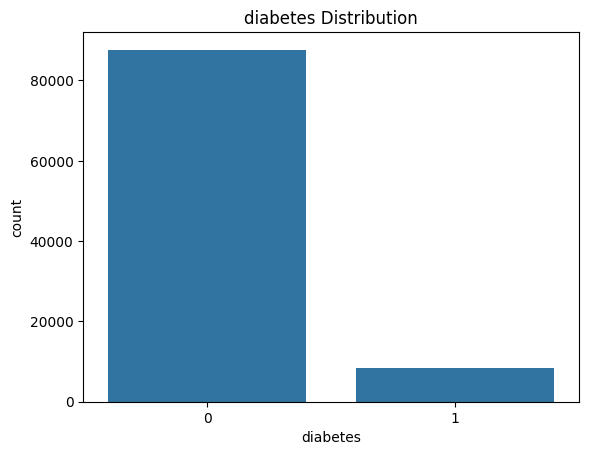

In [53]:
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

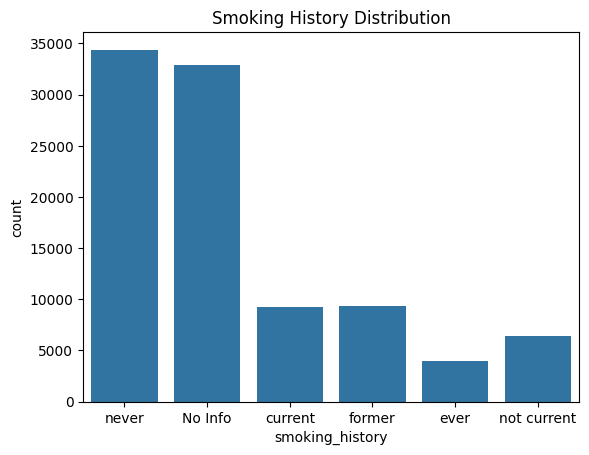

In [54]:
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

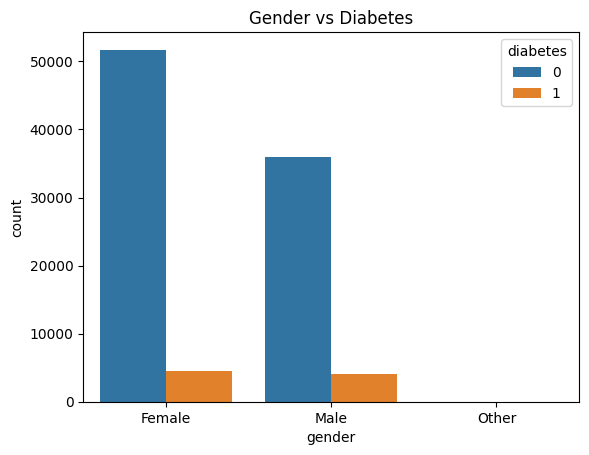

In [55]:
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

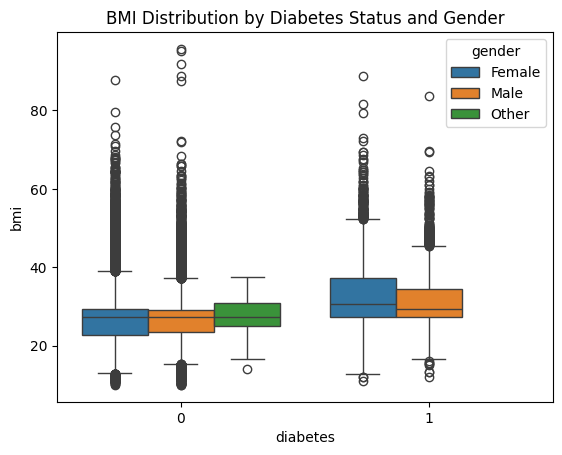

In [56]:
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

In [57]:
df1= df.copy()

In [58]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df1['smoking_history'] = df1['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df1['smoking_history'].value_counts())

smoking_history
non-smoker     67285
past_smoker    19664
current         9197
Name: count, dtype: int64


In [59]:
# Check the new value counts
print(df1['diabetes'].value_counts())

diabetes
0    87664
1     8482
Name: count, dtype: int64


In [60]:
df1.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,non-smoker,25.19,6.60,140,0
1,Female,54.00,0,0,non-smoker,27.32,6.60,80,0
2,Male,28.00,0,0,non-smoker,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0
5,Female,20.00,0,0,non-smoker,27.32,6.60,85,0
6,Female,44.00,0,0,non-smoker,19.31,6.50,200,1
7,Female,79.00,0,0,non-smoker,23.86,5.70,85,0
8,Male,42.00,0,0,non-smoker,33.64,4.80,145,0
9,Female,32.00,0,0,non-smoker,27.32,5.00,100,0


In [61]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

gender_encoder = LabelEncoder()
smoking_encoder = LabelEncoder()

# Apply label encoding to the 'gender' column
df1['gender'] = label_encoder.fit_transform(df1['gender'])

# Verify the encoding
print(df1['gender'].unique())

[0 1 2]


In [77]:
df1.groupby('gender').count()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,,
0,56161,56161,56161,56161,56161,56161,56161,56161
1,39967,39967,39967,39967,39967,39967,39967,39967
2,18,18,18,18,18,18,18,18


In [62]:
# Define the custom mapping
smoking_mapping = {
    'non-smoker': 0,
    'past_smoker': 1,
    'current': 2
}

# Apply the mapping
df1['smoking_history'] = df1['smoking_history'].map(smoking_mapping)


In [75]:
print(df1['smoking_history'].value_counts())

smoking_history
0    67285
1    19664
2     9197
Name: count, dtype: int64


In [63]:
df1.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.00,0,1,0,25.19,6.60,140,0
1,0,54.00,0,0,0,27.32,6.60,80,0
2,1,28.00,0,0,0,27.32,5.70,158,0
3,0,36.00,0,0,2,23.45,5.00,155,0
4,1,76.00,1,1,2,20.14,4.80,155,0
5,0,20.00,0,0,0,27.32,6.60,85,0
6,0,44.00,0,0,0,19.31,6.50,200,1
7,0,79.00,0,0,0,23.86,5.70,85,0
8,1,42.00,0,0,0,33.64,4.80,145,0
9,0,32.00,0,0,0,27.32,5.00,100,0


In [64]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Apply scaling to numerical features
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df1[numerical_features] = scaler.fit_transform(df1[numerical_features])

In [65]:
df1.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.70,0,1,0,-0.31,0.99,0.04,0
1,0,0.54,0,0,0,-0.00,0.99,-1.42,0
2,1,-0.61,0,0,0,-0.00,0.16,0.48,0
3,0,-0.26,0,0,2,-0.57,-0.50,0.41,0
4,1,1.52,1,1,2,-1.06,-0.68,0.41,0
5,0,-0.97,0,0,0,-0.00,0.99,-1.30,0
6,0,0.10,0,0,0,-1.18,0.90,1.51,1
7,0,1.66,0,0,0,-0.51,0.16,-1.30,0
8,1,0.01,0,0,0,0.93,-0.68,0.17,0
9,0,-0.44,0,0,0,-0.00,-0.50,-0.93,0


In [89]:
df2=df1[df1['gender'] != 2]
df2.count()

gender                 96128
age                    96128
hypertension           96128
heart_disease          96128
smoking_history        96128
bmi                    96128
HbA1c_level            96128
blood_glucose_level    96128
diabetes               96128
dtype: int64

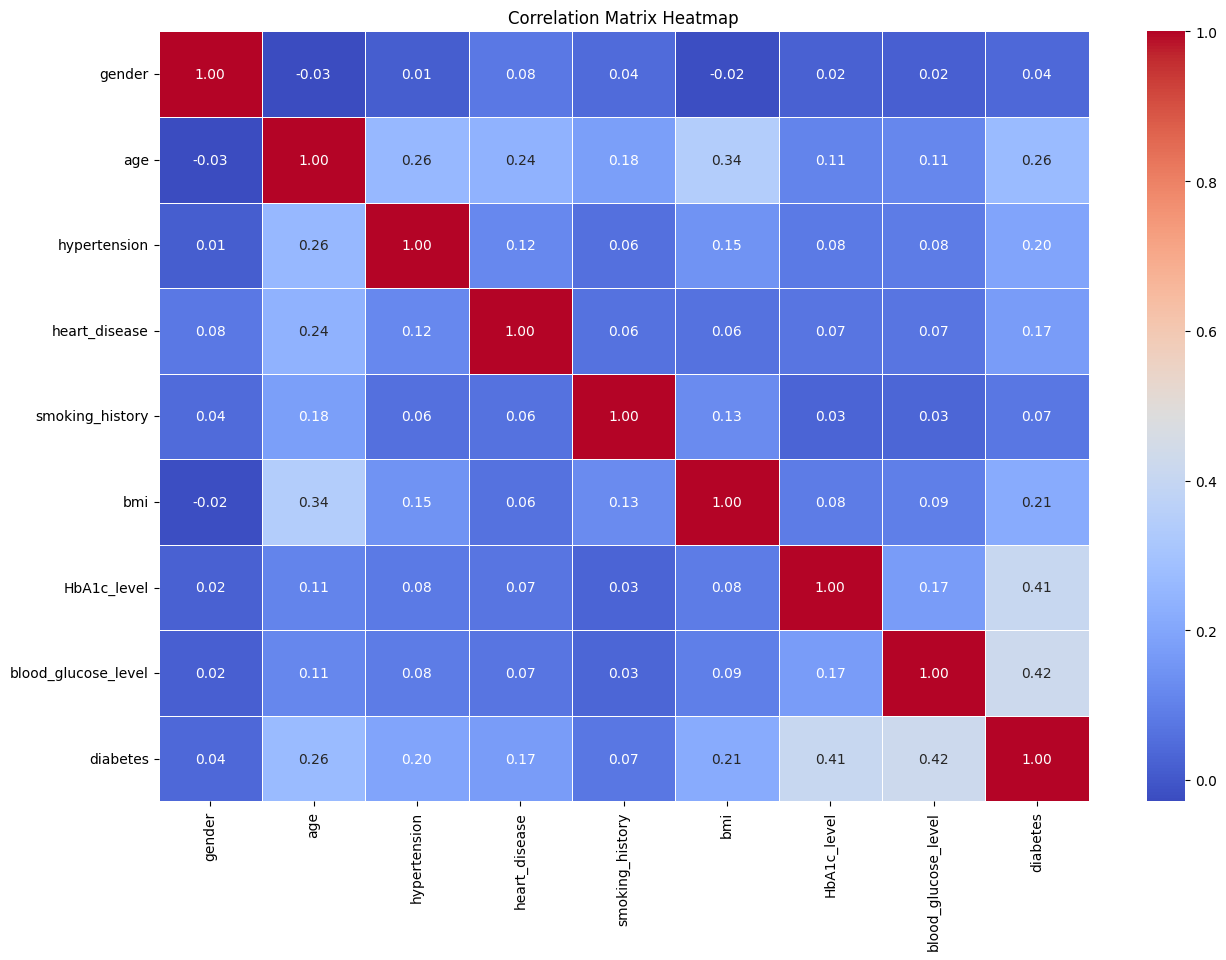

In [90]:
# Compute the correlation matrix
correlation_matrix = df2.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

Random Forest Accuracy: 0.9692603765733901

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       1.00      0.65      0.79      1701

    accuracy                           0.97     19226
   macro avg       0.98      0.83      0.89     19226
weighted avg       0.97      0.97      0.97     19226



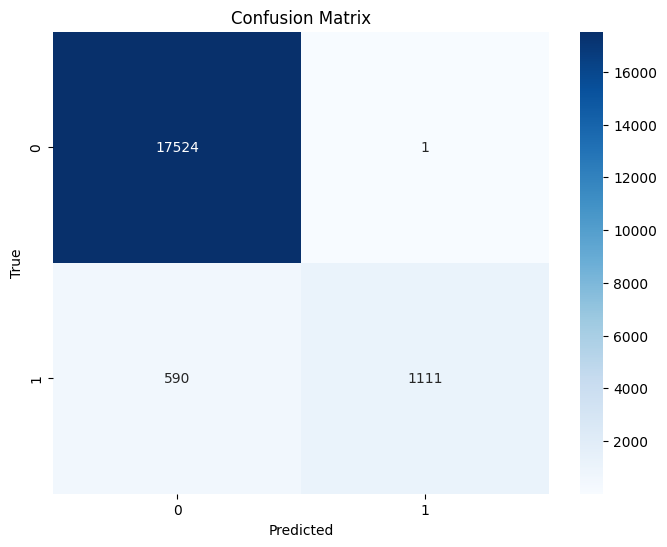

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into features and target variable
X = df2.drop('diabetes', axis=1)  # Assuming 'diabetes' is the target column in your df1
y = df2['diabetes']

feature_names = X.columns.tolist()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# gender_encoder = LabelEncoder()
# smoking_encoder = LabelEncoder()

In [ ]:
# label_encoder = {
#     'gender': gender_encoder,
#     'smoking_history': smoking_encoder
# }

In [106]:
import joblib
model_artifacts = {
    'model': rf_model,
    'scaler': scaler,
    'label_encoder': le,
    'smoking_mapping': smoking_mapping,
    'feature_names': feature_names
}

# Export model and related artifacts
joblib.dump(model_artifacts, 'new_diabetes_prediction_model.pkl')

print("Model and artifacts successfully exported to 'new_diabetes_prediction_model.pkl'")

Model and artifacts successfully exported to 'new_diabetes_prediction_model.pkl'
